In [50]:
import requests  # For sending GET requests from the API
import pandas as pd  # For displaying the data after
import csv  # For saving the response data in CSV format
import time  #To add wait time between requests
from dotenv import dotenv_values  # to import environment variables
from typing import Dict, Tuple, List, Any  # for type hinting
import matplotlib.pyplot as plt  # for plotting data
# import datetime  # For parsing the dates received from twitter in readable formats
# import dateutil.parser
# import unicodedata

In [51]:
# Import env variables into static vars
config = dotenv_values(".env")
API_KEY = config.get("API_KEY")
API_SECRET_KEY = config.get("API_SECRET_KEY")
API_BEARER_TOKEN = config.get("API_BEARER_TOKEN")

In [52]:
MINISTER_TWITTER_HANDLES = {
    "Volker Wissing": ("fdp", 'wissing'),
    "Christian Lindner": ("fdp", 'c_lindner'),
    "Karl Lauterbach": ("spd", "Karl_Lauterbach"),
    "Annalena Baerbock": ("gruene", "ABaerbock"),
    "Nancy Faeser": ("spd", "NancyFaeser"),
    "Marco Buschmann": ("fdp", "MarcoBuschmann"),
    "Hubertus Heil": ("spd", "hubertus_heil"),
    "Cem Özdemir": ("gruene", "cem_oezdemir"),
    "Steffi Lemke": ("gruene", "SteffiLemke"),
    "Bettina Stark-Watzinger": ("fdp", "starkwatzinger"),
    "Svenja Schulze": ("spd", "SvenjaSchulze68"),
    "Klara Geywitz": ("spd", "klara_geywitz"),
    "Wolfgang Schmidt": ("spd", "W_Schmidt_")
}

In [53]:
def account_info_params(twitter_handle: str) -> Dict[str, str]:
    """ builds together parameters for a GET api call to 'https://api.twitter.com/2/users/by' """
    return {"usernames": f"{twitter_handle.lower()}", "user.fields": "created_at,description,id,location,name,profile_image_url,protected,public_metrics,url,username,verified,withheld"}

def get_all_minister_twitter_bios(minister_twitter_handles: Tuple[str, str]) -> List[Dict[str, Any]]:
    """ calls a GET api for all ministers in scope and returns a list of dictionaries"""
    response_container = []
    for party, minister_handle in minister_twitter_handles:
        response = requests.request("GET", url, headers = headers, params=account_info_params(minister_handle.lower()))
        if response.status_code == 200:
            raw_response_data = response.json()["data"][0]
            public_metrics_data = raw_response_data.pop("public_metrics")
            raw_response_data.update(public_metrics_data)
            raw_response_data["party"] = party
            response_container.append(raw_response_data)
        time.sleep(0.2)
    print(f"INFO: {len(minister_bio)}/{len(MINISTER_TWITTER_HANDLES)} Twitter accounts of ministers with Twitter handles fetched.")
    return response_container

def save_info_container(container: List[Dict[str, Any]], path: str) -> None:
    """ saves the data into the /data folder. """
    keys = container[0].keys()
    with open(path, 'w', newline='') as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(container)

headers = {"Authorization": f"Bearer {API_BEARER_TOKEN}"}
url = "https://api.twitter.com/2/users/by"
minister_bio = get_all_minister_twitter_bios(minister_twitter_handles=MINISTER_TWITTER_HANDLES.values())
save_info_container(container=minister_bio, path="data/minister_info.csv")

INFO: 13/13 Twitter accounts of ministers with Twitter handles fetched.


In [54]:
df = pd.read_csv("data/minister_info.csv")
df.head()

,name,location,profile_image_url,created_at,verified,url,description,id,username,protected,followers_count,following_count,tweet_count,listed_count,party
0,Volker Wissing,"Schillerstraße 11a, 55116 Mainz",https://pbs.twimg.com/profile_images/140805921...,2009-02-11T14:34:58.000Z,True,https://t.co/QyGCyDDccr,"Bundesminister für Digitales und Verkehr, Vors...",20593301,Wissing,False,31066,998,13159,616,fdp
1,Christian Lindner,"Berlin, Deutschland",https://pbs.twimg.com/profile_images/128403007...,2010-03-11T16:11:51.000Z,True,https://t.co/mJgVJTabCr,Bundesminister der Finanzen. Bundesvorsitzende...,122104353,c_lindner,False,549303,1371,17671,2407,fdp
2,Prof. Karl Lauterbach,"Berlin, Deutschland",https://pbs.twimg.com/profile_images/601388878...,2015-05-21T14:01:21.000Z,True,https://t.co/aNTUPwOxBp,"SPD Bundestagsabgeordneter, Bundesgesundheitsm...",3292982985,Karl_Lauterbach,False,826984,296,9569,2806,spd
3,Außenministerin Annalena Baerbock,Berlin,https://pbs.twimg.com/profile_images/146932792...,2021-12-10T11:15:44.000Z,True,https://t.co/bR6R0XD5I5,Offizieller Twitter Account von Außenministeri...,1469264387512979461,ABaerbock,False,91006,39,7,249,gruene
4,Nancy Faeser,Hessen,https://pbs.twimg.com/profile_images/132101093...,2012-06-27T16:33:18.000Z,True,https://t.co/Zu3jph3Ylw,Bundesministerin des Innern und für Heimat | V...,620221740,NancyFaeser,False,53837,386,1083,340,spd


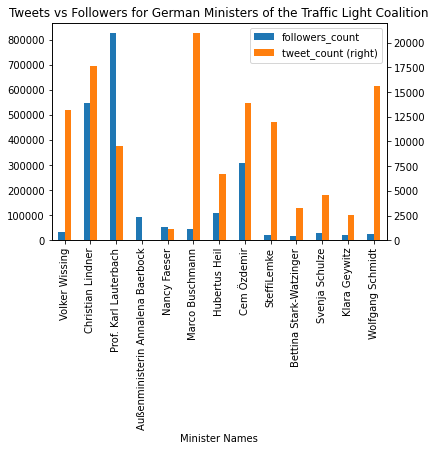

In [55]:
# Some visualization
ratio_plt = df.plot(kind= "bar", x="name", y=["followers_count", "tweet_count"], secondary_y="tweet_count")
ratio_plt.set_title("Tweets vs Followers for German Ministers of the Traffic Light Coalition")
ratio_plt.set_xlabel("Minister Names")
plt.show()

In [56]:
party_stats_df = df.groupby(by=["party"])["followers_count", "tweet_count"].mean().sort_values(by=["followers_count", "tweet_count"], ascending=[False, True])
party_stats_df

/var/folders/n6/gc1kg4891tzd041w9shtbb_c0000gn/T/ipykernel_9930/1972160138.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  party_stats_df = df.groupby(by=["party"])["followers_count", "tweet_count"].mean().sort_values(by=["followers_count", "tweet_count"], ascending=[False, True])


,followers_count,tweet_count
party,,
spd,177346.333333,6678.166667
fdp,160089.000000,13764.750000
gruene,140726.000000,8623.000000


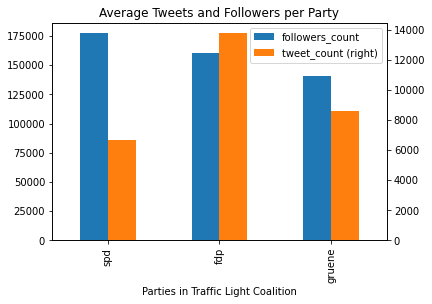

In [57]:
party_stats_plt = party_stats_df.plot(kind="bar", y=["followers_count", "tweet_count"], secondary_y="tweet_count")
party_stats_plt.set_title("Average Tweets and Followers per Party")
party_stats_plt.set_xlabel("Parties in Traffic Light Coalition")
plt.show()